<a href="https://colab.research.google.com/github/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/blob/main/Multiple_Linear_Regression_Group_Project_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plan**

Load data

Split dataset into training and test dataset, use training dataset to create the model.

Display sample data and summary


Calculate normality p-value

Calculate lineral regression model and display values

Display regression summary

Display scatterplot again with calculated regression line

Compare actual and predicted values to determine accuracy of the linear regression equation

Observe residuals data in graphical form to draw conclusions


Normality in Mulitiple Linear Regression
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/normality/


In [3]:
#Read this csv file from GitHub into Jupyter Notebook.
dataset = pd.read_csv(r"https://raw.githubusercontent.com/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/main/Real_estate.csv")

In [4]:
dataset.rename(columns={'X1 transaction date': 'PurchaseDate'}, inplace=True)
dataset.rename(columns={'X2 house age': 'HouseAge'}, inplace=True)
dataset.rename(columns={'X3 distance to the nearest MRT station': 'MRTStation'}, inplace=True)
dataset.rename(columns={'X4 number of convenience stores': 'NumberOfStores'}, inplace=True)
dataset.rename(columns={'X5 latitude': 'Latitude'}, inplace=True)
dataset.rename(columns={'X6 longitude': 'Longitude'}, inplace=True)
dataset.rename(columns={'Y house price of unit area': 'HousePrice'}, inplace=True)

In [5]:
#Make a copy and populate with training data
datasettraining = dataset.copy()
datasettest = dataset.copy()

#Take a random sample of 75% of the data for training (and put them into order and renumber to eliminate missing index values)
datasettraining = datasettraining.sample(frac = .75).sort_index().reset_index(drop=True)

#Get remaining 25% of data rows from dataset (remove all rows from dataset that aren't already in datasettraining)
datasettest = (pd.merge(dataset, datasettraining, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)).sort_index().reset_index(drop=True)

In [6]:
#Check training data head
datasettraining.head()

,No,PurchaseDate,HouseAge,MRTStation,NumberOfStores,Latitude,Longitude,HousePrice
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3


In [7]:
#Summary of all fields
datasettraining.describe()

,No,PurchaseDate,HouseAge,MRTStation,NumberOfStores,Latitude,Longitude,HousePrice
count,310.00000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,209.73871,2013.149752,17.214839,1143.063131,4.074194,24.968675,121.532994,37.478065
std,116.76616,0.279096,11.362576,1302.213481,2.929204,0.012508,0.015939,13.724889
min,1.00000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,111.25000,2012.917000,8.325000,289.324800,1.000000,24.962990,121.524340,27.300000
50%,207.50000,2013.167000,15.800000,516.124400,4.000000,24.970100,121.538535,38.000000
75%,312.00000,2013.417000,26.350000,1712.632000,6.000000,24.977190,121.543438,46.275000
max,413.00000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
#Summary of all fields
datasettest.describe()

,No,PurchaseDate,HouseAge,MRTStation,NumberOfStores,Latitude,Longitude,HousePrice
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,200.826923,2013.146644,19.196154,907.491391,4.153846,24.970087,121.534454,39.476923
std,128.241765,0.291724,11.407125,1121.566307,3.007335,0.012113,0.013440,13.198670
min,5.000000,2012.667000,0.000000,49.661050,0.000000,24.932930,121.484580,15.400000
25%,78.750000,2012.917000,12.450000,287.294850,1.000000,24.963330,121.530860,29.675000
50%,210.000000,2013.167000,16.650000,418.162400,4.000000,24.974035,121.539710,40.250000
75%,310.250000,2013.417000,30.150000,1159.700500,6.000000,24.978552,121.543125,47.025000
max,414.000000,2013.583000,41.400000,5512.038000,10.000000,24.991560,121.553910,78.300000


In [9]:
#Set Variable Choices
MultiVarChoices = ['PurchaseDate', 'HouseAge', 'MRTStation', 'NumberOfStores', 'Latitude', 'Longitude']

response = 'HousePrice'

#Create Linear Regression object
model = LinearRegression()

#Fit the dataset
model.fit(datasettraining[MultiVarChoices], datasettraining[response])

LinearRegression()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee85497490>,
      dtype=object)

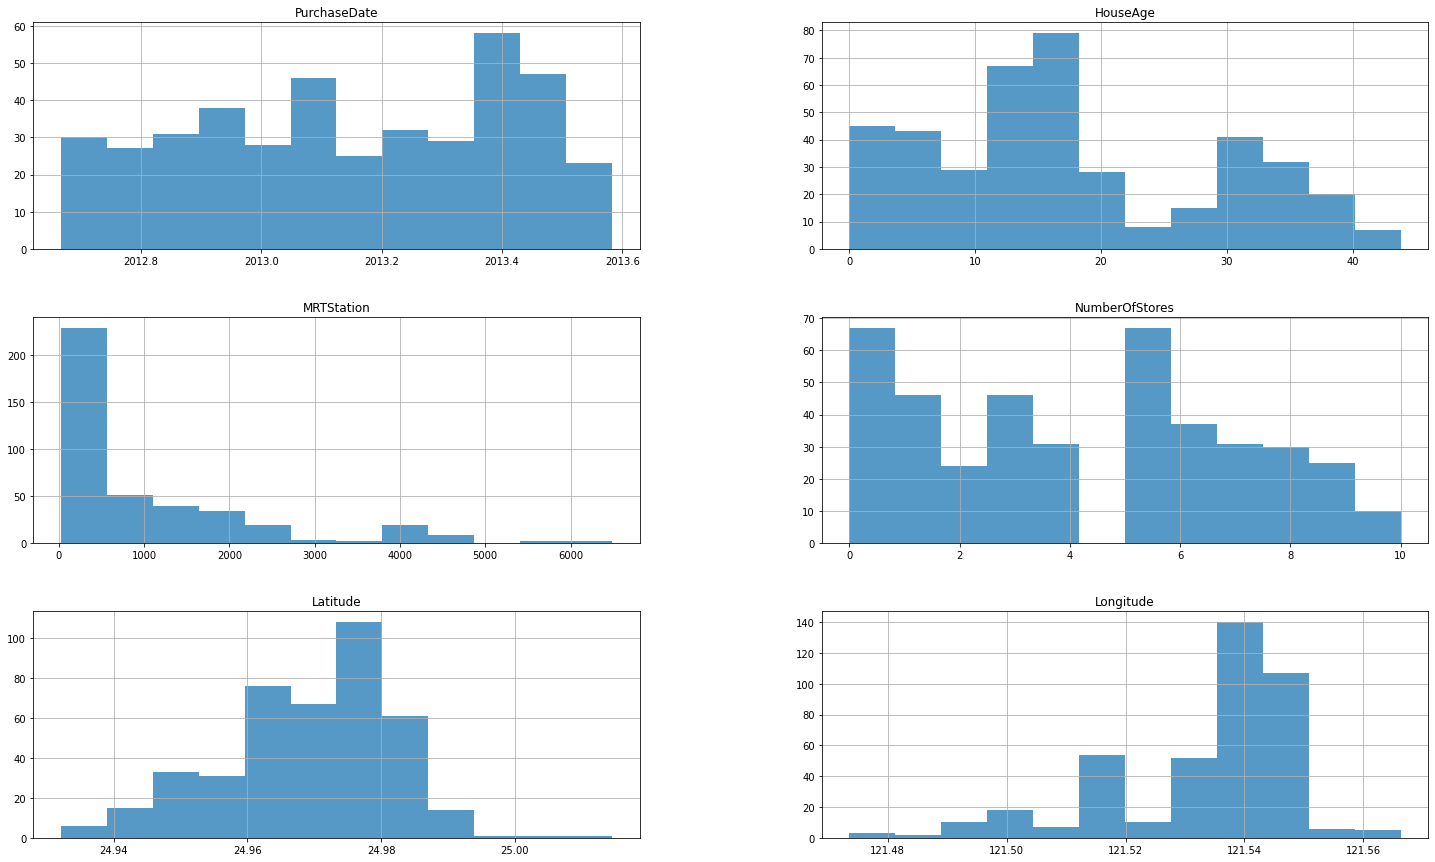

In [10]:
#getonly fields included in model
plots = dataset[MultiVarChoices]

#Display histograms for fields in model
#Set size of histogram
f, ax = plt.subplots(1, 1, figsize = (25, 15))

#Display histogram
plots.hist(bins=12, alpha=0.75, ax=ax)

In [11]:
#Gernate list of predictions from test data
predictions = model.predict(datasettest[MultiVarChoices])  

#Check test data head
datasettest.head() 

,No,PurchaseDate,HouseAge,MRTStation,NumberOfStores,Latitude,Longitude,HousePrice
0,5,2012.833,5.0,390.5684,5,24.97937,121.54245,43.1
1,6,2012.667,7.1,2175.0300,3,24.96305,121.51254,32.1
2,9,2013.500,31.7,5512.0380,1,24.95095,121.48458,18.8
3,10,2013.417,17.9,1783.1800,3,24.96731,121.51486,22.1
4,11,2013.083,34.8,405.2134,1,24.97349,121.53372,41.4


In [12]:
#Sample data output
print('Actual'.ljust(14), 'Predicted'.ljust(14))
print(response.ljust(14), response.ljust(14))

for i in [0,1,2,3,4,95,96,97,98,99]:
    print(str(datasettest[response][i]).ljust(14), str(predictions[i]).ljust(14))

Actual         Predicted     
HousePrice     HousePrice    
43.1           46.21707661887922
32.1           31.342775789153166
18.8           8.530321964921313
22.1           34.54195740078467
41.4           33.993980086805095
69.7           50.710806612965825
53.3           47.05309466121798
40.3           37.22961224863502
37.3           40.54137574799279
28.1           31.622573344937337


In [13]:
#Check accuracy of model (Coefficient of Determination)
r_sq = model.score(datasettraining[MultiVarChoices], datasettraining[response])
print('Coefficient of Determination:', r_sq)

Coefficient of Determination: 0.5875217036060292


In [14]:
#Get the Y-intercept value
salIntercept = model.intercept_

#Get the Coefficents for the formula.
salCoef = model.coef_

#Output formula variables for regression analysis.
print('Intercept:', salIntercept,'\n')

print("Coefficients:")
list(zip(datasettraining[MultiVarChoices], salCoef))

Intercept: -12310.686862623863 

Coefficients:


[('PurchaseDate', 4.4549045782046015),
 ('HouseAge', -0.2738535157149683),
 ('MRTStation', -0.004649800252672753),
 ('NumberOfStores', 0.9653240212025952),
 ('Latitude', 245.53891774782497),
 ('Longitude', -22.58572022304535)]

In [17]:
#Assemble fields for model
mmfields = response + ' ~ ' + ' + '.join(MultiVarChoices)

# fit multi linear regression model
multi_model = ols(mmfields, data=datasettraining).fit()

# display model summary
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:             HousePrice   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     71.93
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           2.21e-55
Time:                        16:21:42   Log-Likelihood:                -1114.1
No. Observations:                 310   AIC:                             2242.
Df Residuals:                     303   BIC:                             2268.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.231e+04   7460.582     -1.

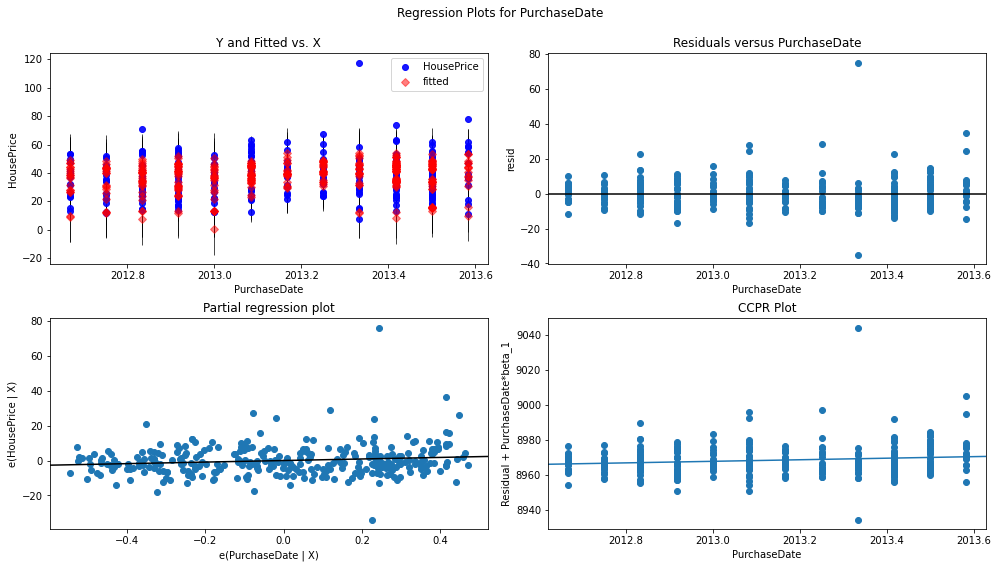

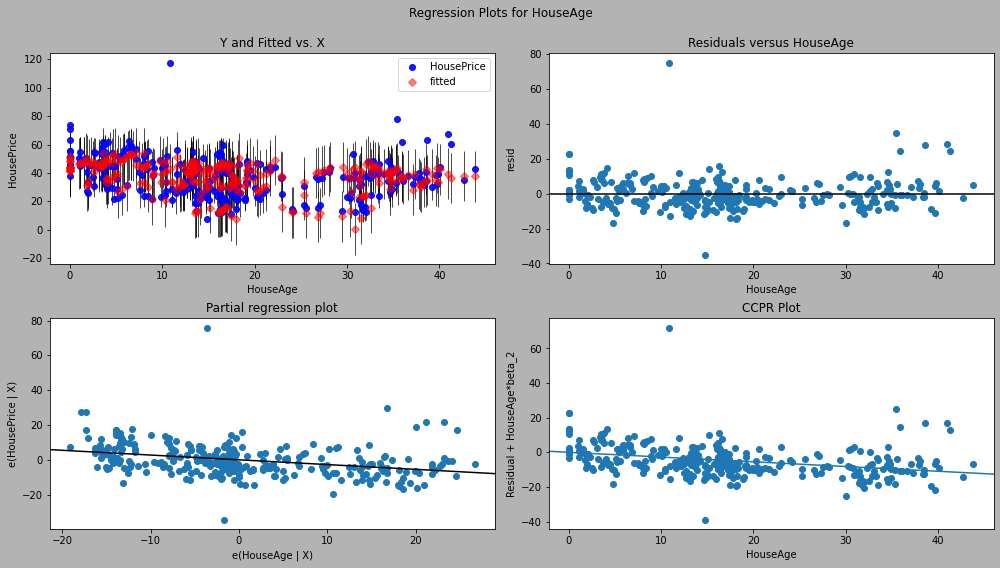

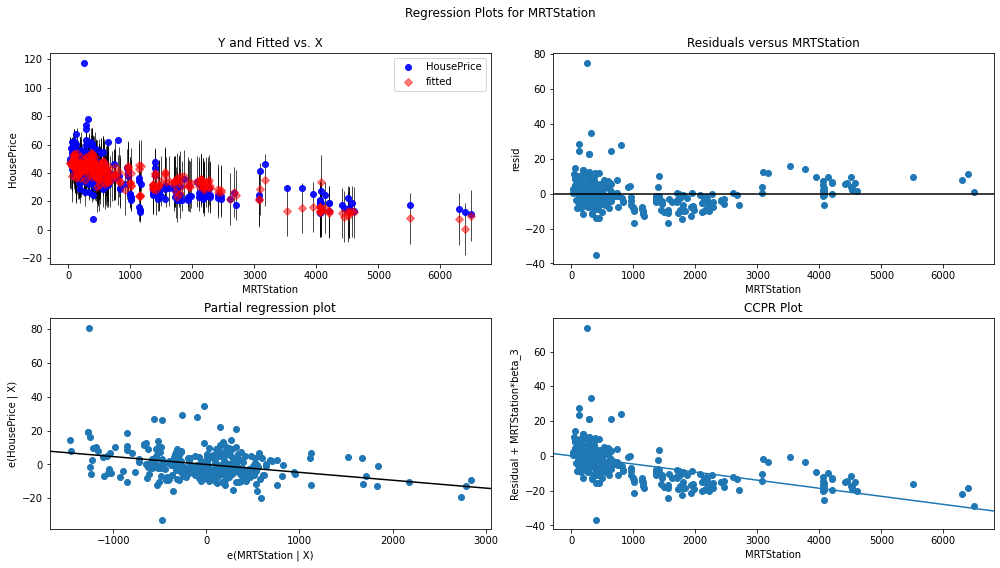

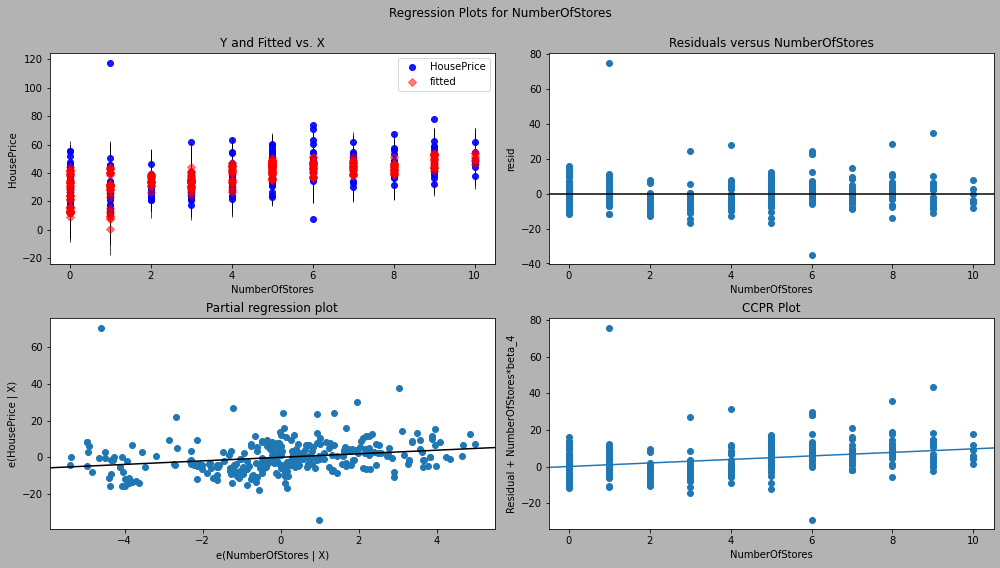

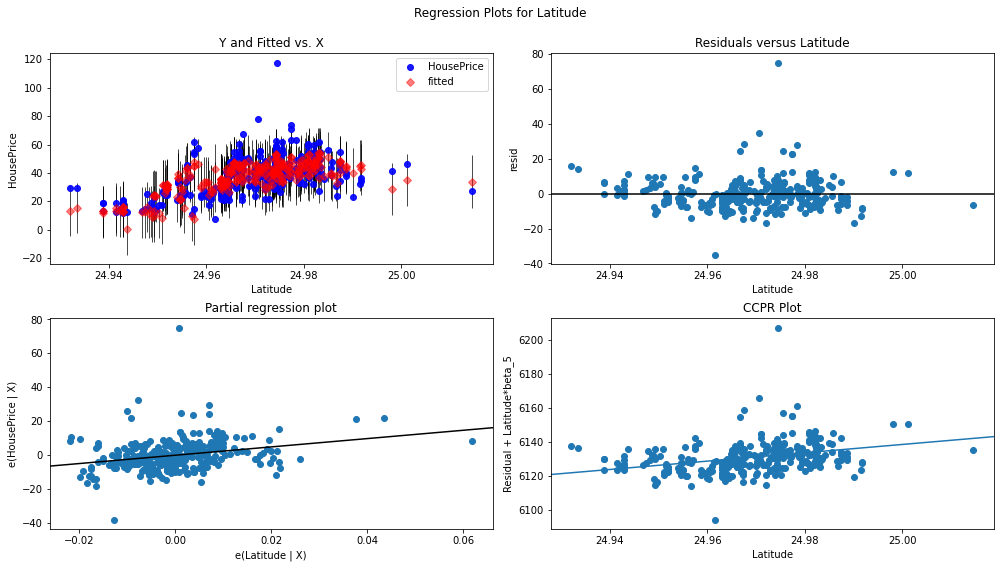

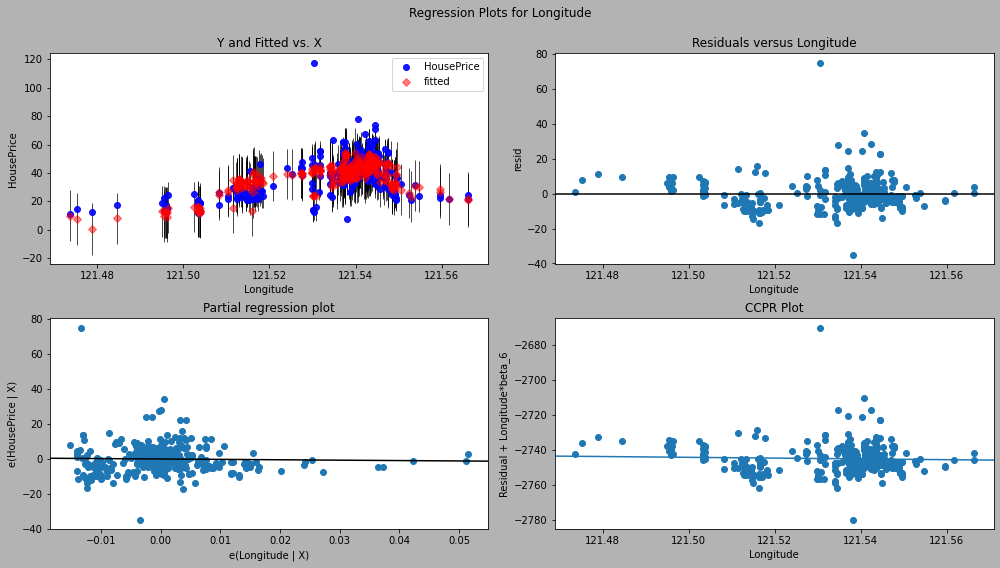

In [18]:
#Set background color
facecolor = '0.7'
for i in range(0,len(MultiVarChoices)):
  #Alternate background color so it's easier to see separate graphs for the different residuals
  if (facecolor == '0.7'):
    facecolor = '1'
  else:
    facecolor = '0.7'
  #Fresh figure so graphs don't all stack together
  fig = None
  # modify figure size
  fig = plt.figure(figsize=(14, 8))
  fig.patch.set_facecolor(facecolor)
  #Creating regression plots
  fig = sm.graphics.plot_regress_exog(multi_model, MultiVarChoices[i],fig=fig)
  fig.show()